_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Übung 08 - Allgemein: All the best words...
### Praktische Hinweise
$\rightarrow$ Übungen sind dafür gedacht, dass ihr sie euch daheim anseht und versucht, ein paar Aufgaben selbst zu lösen. In den Tutorien könnt ihr euch weiter mit dem Lösungen der Aufgaben beschäftigen und dabei Hilfe von den Tutor*innen bekommen.  

$\rightarrow$ Wenn ein Fehler auftritt:
1. Fehlermeldung _lesen_ und _verstehen_
2. Versuchen, selbst eine Lösung zu finden ($\rightarrow$ hier findet das Lernen statt!)
3. Das Problem googlen (Stichwort: Stackoverflow) oder den/die Nachbar*in fragen
4. Tutor*in fragen

$\rightarrow$ Unter <font color='green'>**HINWEIS**</font> werden Hinweise gegeben, die für die Lösung der Aufgabe hilfreich sind und oftmals auch weiterführende Informationen zur Aufgabe liefern.

$\rightarrow$ Mit **(Optional)** gekennzeichnete Übungsteile sind für besonders schnelle Menschen :-).

<a name="top"></a>Inhalt
---
In einer Rede während seines Wahlkampfes im Dezember 2015 hat Donal Trump behauptet: ["I have all the best words"](https://www.washingtonpost.com/video/national/trump-i-have-the-best-words/2017/04/05/53a9ae4a-19fd-11e7-8598-9a99da559f9e_video.html?noredirect=on&utm_term=.f89fafd44af6). Wir würden jetzt gerne anhand der von ihm vorliegenden Tweets (und im Vergleich mit den Tweets der anderen User-Gruppen) herausfinden, ob er wirklich die "besten Worte" hat.

Im zweiten und komplett optionalen Teil wollen wir uns mit statistischer Inferenz beschäftigten, also einen Zusammenhang zwischen einer Ausgangsgröße (Tweet-Länge) und einer Zielgröße (Wortanzahl) herstellen.  
Das Tutorial gliedert sich in
* [Wortvorlieben](#wortvorlieben)
* [Inferenz](#inferenz)

**WICHTIG**: bevor du mit dem Bearbeiten dieser Übung anfängst, stelle sicher, dass die Datensätze 
* ```tweets_normal_subsample.csv```,
* ```tweets_troll_subsample.csv``` und
* ```tweets_trump_bereinigt.csv```  
im Ordner ```data``` liegen. Diese Datensätze werden im Verlauf von Übung 07 erzeugt. 

<a name="wortvorlieben"></a>1. Wortvorlieben
---
Zur Vorbereitung laden wir wieder die drei Datensätze:

In [14]:
import pandas as pd
from os.path import join

tweets_normal = pd.read_csv(join('data','tweets_normal_subsample.csv'), encoding='ISO-8859-1', lineterminator='\n')
tweets_troll = pd.read_csv(join('data','tweets_troll_subsample.csv'), encoding='ISO-8859-1', lineterminator='\n')
tweets_trump = pd.read_csv(join('data','tweets_trump_bereinigt.csv'), encoding='ISO-8859-1', lineterminator='\n')

tweets_troll.head(3)

,Date,User,Tweet,tweet_length,word_number
0,2009-04-06 22:21:00,itsanimesh,really don't feel like getting up today... but...,95,17
1,2009-04-06 22:23:00,paulseverio,Why won't you show my location?! http://twit...,59,9
2,2009-04-06 22:26:00,ItsBrigittaYo,why is it always the fat ones?!,32,8


Als ersten Schritt müssen wir Trumps Aussage interpretieren. Wie ist "best" gemeint? Mögliche Interpretationen sind:  
    **1)** Trump benutzt die ausgefallensten und damit längsten Worte  
    **2)** Trump hat den größten Wortschatz  
    
Um Interpretation **1)** zu überprüfen, müssen wir die Wortlängen in den Tweets ausrechnen und miteinander vergleichen. Dafür müssen wir erst einmal eine Liste der Worte aus den Tweets generieren. Wie wir in Übung **07** gelernt haben, enthalten die Tweets auch Hashtags und Links. Die können wir direkt herausfiltern. Dafür bauen wir uns ähnlich der Funktion ```isHashtag()``` aus Übung **07** eine Funktion ```isWord()``` die herausfindet, ob ein Wort ein Hashtag oder Link ist:

In [4]:
def isWord(word):
    # ist das Wort ein Hashtag oder Link?
    if ('#' in word) or ('http' in word):
        # wenn ja, gib "False" zurück und verlasse
        # die Funktion
        return False
    # wenn nein, gib "True" zurück und verlasse 
    # die Funktion
    return True

In [5]:
# alle von Trump benutzten Worte

# Liste, um alle vorkommenden Worte zu speichern
words_trump = []

# iteriere über alle Tweets
for tweet in tweets_trump['Tweet']:
    # zerteile den Tweet entlang der Leerzeichen in Worte
    words = tweet.split(' ')
    # filtere die Hashtags und Links aus der Wortliste heraus
    words = [word for word in words if isWord(word)]
    # hänge die Liste mit Worten an die globale Liste an
    words_trump.extend(words)

    
# berechne die Wortlänge für jedes Wort und speichere sie in einer Liste
word_length_trump = [len(word) for word in words_trump]

# erstelle ein neues DataFrame
words_trump_df = pd.DataFrame({'word':words_trump, 'length':word_length_trump})
# die ersten paar Einträge des DataFrame
words_trump_df.head()

,word,length
0,Read,4
1,a,1
2,great,5
3,interview,9
4,with,4


**A.** Erstelle auch für die Trolle und die normalen User eine bereinigte Wortliste und ein DataFrame, das die Worte und ihre Längen enthält.

**B.** Wieviele unterschiedliche Worte enthalten die Listen jeweils? Wieviele Worte hat die Englische Sprache? Warum würde das Ergebnis verzerrt werden, wenn wir auch andere Sprachen im Datensatz vorliegen hätten?

Die Wortlisten, die wir nun haben, enthalten immer noch ziemlich viele Kunstworte, Abkürzungen oder falsch geschriebene Worte. Da wir ja herausfinden wollen, ob Trump die "besten" Worte hat, ist es gerechtfertigt, die Wortlisten mit einem Wörterbuch abzugleichen und alle Worte hinauszuwerfen, die nicht teil der Englischen Sprache sind. Das geht in Python sehr einfach, indem wir die [Bibliothek pyEnchant](https://stackoverflow.com/questions/3788870/how-to-check-if-a-word-is-an-english-word-with-python) verwenden, die verschiedene Wörterbücher zur Verfügung stellt (siehe [dieser](https://stackoverflow.com/questions/3788870/how-to-check-if-a-word-is-an-english-word-with-python) StackOverflow Post). Da diese Bibliothek noch nicht auf dem JupyterHub installiert ist, müssen wir dies erst manuell tun (Näheres z.B. in [dieser](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/) Beschreibung):

In [6]:
# die nachfolgenden Kommandos musst du dir nicht merken. Falls du jemals eine
# eigene Bibliothek nachinstallieren willst, ersezte "pyenchant" mit dem
# Namen der von dir benötigten Bibliothek

# die Bibliothek "sys" gibt uns Zugriff auf Funktionen des Betriebssystems
# mit dem Operator "!" führen wir Code nicht im Python-Interpreter sondern
# auf der Kommandozeile aus. 
import sys
!{sys.executable} -m pip install pyenchant

import enchant

You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
# erstelle ein Wörterbuch mit (amerikanischem) Englisch
woerterbuch = enchant.Dict("en_US")

# überprüfe, ob das Wort "hello" im Wörterbuch zu finden ist
wort = "Hello"
print('"{}" ist Teil der Englischen Sprache? {}'.format(wort, woerterbuch.check(wort)))

wort = "Helo"
# Gegencheck: ein Wort, das nicht existiert
print('"{}" ist Teil der Englischen Sprache? {}'.format(wort, woerterbuch.check(wort)))

"Hello" ist Teil der Englischen Sprache? True
"Helo" ist Teil der Englischen Sprache? False


Jetzt können wir die Wortliste danach filtern, ob die Worte auch im Englischen Wörterbuch zu finden sind. Eine beliebige Funktion - wie z.B. die Funktion ```check()``` des ```woerterbuch```-Objektes können wir mit Hilfe der Funktion ```apply()``` auf jedes Element einer Spalte des DataFrames anwenden (siehe [Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)) und so in gewohnter Weise eine Maske erstellen:

In [8]:
# erstelle eine Maske der Worte, die im Wörterbuch enthalten sind
woerterbuch_mask = words_trump_df['word'].apply(woerterbuch.check)
# filtere das DataFrame mit der Maske
words_trump_df = words_trump_df[woerterbuch_mask]

ValueError: can't check spelling of empty string

Das führt erst einmal zu einem Fehler, da in der Tabelle anscheinend auch leere Strings ```" "``` enthalten sind, mit denen das Wörterbuch nichts anzufangen weiß. Die können wir einfach mit einem Filter aus dem DataFrame entfernen:

In [9]:
# erstelle eine Maske der Leeren Strings ''
mask_empty = words_trump_df['word'] != ''
# filtere die leeren Strings aus dem DataFrame heraus
words_trump_df = words_trump_df[mask_empty]

# erstelle eine Maske der Worte, die im Wörterbuch enthalten sind
woerterbuch_mask = words_trump_df['word'].apply(woerterbuch.check)
# filtere das DataFrame mit der Maske
words_trump_df = words_trump_df[woerterbuch_mask]
N_trump = len(words_trump_df['word'].unique())

print('Trump hat {} unterschiedliche Worte benutzt.'\
      .format(N_trump))

Trump hat 25746 unterschiedliche Worte benutzt.


**C.** Filtere auch die beiden anderen Wortlisten entsprechend. Wieviele Worte bleiben für Trump, die Trolle und die normalen User übrig? Gibt es einen großen Unterschied?

**D.** Stelle die Anzahl der benutzten Worte in einem Barchart <font color='green'>**HINWEIS:** Funktion ```plt.bar()```, [Dokumentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.bar.html) </font> dar.

**E. ** Verändere den im Barchart angezeigten y-Achsenabschnitt so, dass es so aussieht, als würde Trump viel weniger Worte als die Trolle benutzen. <font color='green'>**HINWEIS:** Funktion ```plt.ylim(ymin, ymax)``` </font>. Was ist daran problematisch?


**F.** Was ist die mittlere Länge der benutzten Worte? Findest du Vergleichswerte, für die Englische Sprache? Sind die verwendeten Worte eher lang oder eher kurz?

**G.** Hat Trump die besten Worte?

**H. (optional)** _...and there is no better word than "stupid"._ (so endet Trumps Auslassung über die "besten" Worte bei seiner Wahlkampfrede). Wie oft verwendet Trump das Wort "stupid" in seinen Tweets? Wie oft die Trolle und die normalen User?

**I. (optional)** Eine interessante Erkenntnis aus den Sprachwissenschaften ist das [Zipf-Gesetz](https://en.wikipedia.org/wiki/Zipf%27s_law). Was hat es damit auf sich? Kannst du das Gesetz anhand der von Trump verwendeten Worte nachfollziehen? **ACHTUNG:** Bei dieser Übung musst du wahrscheinlich über alle Worte in allen Tweets iterieren, was sehr lange dauern kann und viel Leistung verschliengt. Deswegen gibt es für diese Übung auch keine Lösung und wir empfehlen dir, hierfür eine lokale Python-Installation zu nutzen und nicht den JupyterHub oder die J

<a name="inferenz"></a>2. Inferenz
---
Im Folgenden wollen wir herausfinden, wie die Anzahl der Worte in einem Tweet mit der Tweet-Länge zusammenhängt.

**A. (optional)** Filtere den Datensatz der normalen User so, dass er nur noch Tweets mit einer Länge kleiner oder gleich 140 Zeichen enthält.

In [10]:
tweets_normal_140 = tweets_normal[tweets_normal['tweet_length'] <= 140]

Die Funktion ```plt.scatter(x,y)``` ([Dokumentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html)) erlaubt es uns, einen einfachen Scatterplot zu erstellen:

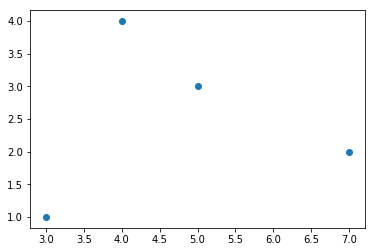

In [11]:
import matplotlib.pyplot as plt
# diese Zeile wird benötigt, damit Matplotlib die Abbildungen direkt im Notebook anzeigt
%matplotlib inline

x = [3,5,7,4]
y = [1,3,2,4]

plt.scatter(x,y)

**B. (optional)** Stelle die Tweet-Länge in dem in Aufgabe **2.A** gefilterten DataFrame über der Wortanzahl im selben DataFrame mit Hilfe eines Scatterplots dar. Vergiss nicht auf die Beschriftungen.

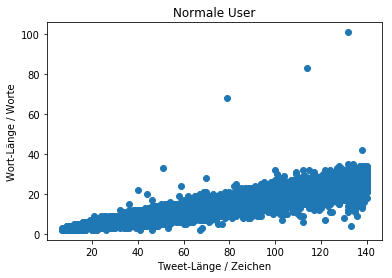

In [12]:
plt.scatter(tweets_normal_140['tweet_length'], tweets_normal_140['word_number'])
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Wort-Länge / Worte')
plt.title('Normale User');

**C. (optional)** Mache dich mit der Funktion ```linregress()``` der Bibliothek SciPy vertraut ([Dokumentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)). Was für Eingabewerte verlangt die Funktion? Was für Werte gibt sie aus?

**Eingabewerte:**
* _die unabhängige Variable ```x``` (in unserem Fall die Tweet-Länge in Zeichen)_
* _die abhängige Variable ```y``` (in unserem Fall die Anzahl der Worte je Tweet)_

**Ausgabewerte:**
Die Ausgabewerte der Funktion beschreiben eine Gerade, sowie Maße für die Unsicherheit der Regression
* _```slope``` ist die Steigung der Geraden._
* _```intercept``` ist der Achsenabschnitt der Geraden._
* _der ```rvalue``` ist der "Korrelationskoeffizient" und gibt an, wie stark die abhängige Größe mit der unabhängigen korreliert. Ist ```rvalue=1```, dann steigt die abhängige Größe immer genau dann, wenn die unabhängige auch steigt. Ist ```rvalue=0```, dann sind die beiden Größen unabhängig voneinander. Ist ```rvalue=-1```, dann sinkt die abhängige Größe genau dann, wenn die unabhängige Größe steigt (anti-korreliert)._
* _der ```pvalue``` ([p-Wert](https://de.wikipedia.org/wiki/P-Wert)) gibt an wie wahrscheinlich es ist eine Testgröße zu erhalten die noch unwahrscheinlicher ist als die beobachtete, unter der Annahme, dass die Nullhypothese wahr ist._
* _der ```stderr``` ist der [Standardfehler](https://de.wikipedia.org/wiki/Standardfehler) der Steigung._

**D. (optional)** führe eine lineare Regression der Wortanzahl über der Tweet-Länge durch. Gib die resultierenden Werte aus. Was bedeuten sie? 

In [18]:
# importieren des Untermoduls "stats" von SciPy
from scipy import stats

# Ausführen der Regression. Die Rückgabewerte werden 5 Variablen zugewiesen
slope, intercept, rvalue, pvalue, stderr = stats.linregress(tweets_normal_140['tweet_length'], tweets_normal_140['word_number'])

# Ausgabe der Ergebnisse
print('Resultierende Gerade: y(x) = {:1.2f} + ({:1.2f} +- {:1.2f}) * x'.format(intercept, slope, stderr))
print('Korrelationskoeffizient: {:1.2f}, p-Wert: {:1.2f}'.format(rvalue, pvalue))

Resultierende Gerade: y(x) = 0.60 + (0.19 +- 0.00) * x
Korrelationskoeffizient: 0.95, p-Wert: 0.00


* _Der Korrelationskoeffizient sagt uns, dass die Wortanzahl stark mit der Tweet-Länge korreliert._
* _Der p-Wert sagt uns, dass dieses Ergebnis hoch signifikant ist und die Wahrscheinlichkeit, dass die Nullhypothese wahr ist bei 0% liegt._
* _Dieses Ergebnis hätten wir uns intuitiv aus unserer Erfahrung mit dem Sprachgebrauch auch denken können, aber jetzt haben wir es zumindest statistisch signifikant bestätigt :)_

**E. (optional)** Plotte die aus der statistischen Regression resultierende Linie über dem Scatterplot aus Aufgabe **2.B** dar.

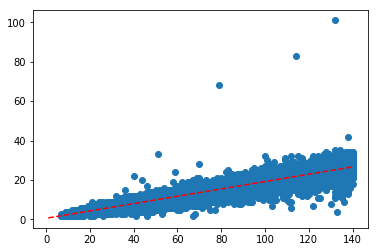

In [19]:
# importiere numpy, um mit der Funktion "arange()" ein "array",
# also eine Liste, mit der man rechnen kann, zu erstellen
import numpy as np
x = np.arange(1,141) # Tweet-Länge zwischen 1 und 140 Zeichen
y = intercept + slope * x

# scatterplot
plt.scatter(tweets_normal_140['tweet_length'], tweets_normal_140['word_number'])

# plot der linie y(x) = intercept + slope * x
plt.plot(x, y, '--', color='red')

[Anfang](#top)